In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#
# Import Keras modules
from keras import models
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.neural_network import MLPClassifier # neural network

In [2]:
# Load the iris dataset


# Load the data set and see first 5 rows
a = pd.read_csv('iris.csv')
iris = pd.DataFrame(a)
iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [6]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [7]:
clf.fit(X_train, y_train)

D:\Users\sf41\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [8]:
prediction = clf.predict(X_test)
print(prediction)

[2 1 1 2 1 1 2 1 2 0 1 2 0 1 0 1 2 2 1 2 2 0 1 2 2 2 1 2 1 2 1 0 1 1 2 2 1
 0 0 1 2 2 1 0 0]


In [9]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Multi-layer Perceptron is: 0.8


In [10]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [11]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(4,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))

In [12]:
learning_rate=0.01
sgd=SGD(learning_rate)
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
H=network.fit(X_train, train_labels, epochs=100, batch_size=10,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 1s 33ms/step - loss: 1.0144 - accuracy: 0.6310 - val_loss: 0.9269 - val_accuracy: 0.7619
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9091 - accuracy: 0.6429 - val_loss: 0.8443 - val_accuracy: 0.8095
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8324 - accuracy: 0.6786 - val_loss: 0.7679 - val_accuracy: 0.9048
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7712 - accuracy: 0.7143 - val_loss: 0.7073 - val_accuracy: 0.7143
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7182 - accuracy: 0.7381 - val_loss: 0.6416 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6754 - accuracy: 0.7143 - val_loss: 0.5846 - val_accuracy: 0.9048
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6321 - accuracy: 0.8452 - val_loss: 0.5388 - val_accuracy: 0.7143
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 5ms/step - loss: 0.2896 - accuracy: 0.8690 - val_loss: 0.0963 - val_accuracy: 0.9524
Epoch 60/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.9286 - val_loss: 0.1331 - val_accuracy: 0.9524
Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1992 - accuracy: 0.9286 - val_loss: 0.0974 - val_accuracy: 1.0000
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3529 - accuracy: 0.8333 - val_loss: 0.2226 - val_accuracy: 0.9048
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2041 - accuracy: 0.9286 - val_loss: 0.1519 - val_accuracy: 0.9524
Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1908 - accuracy: 0.9167 - val_loss: 0.0933 - val_accuracy: 1.0000
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1890 - accuracy: 0.9167 - val_loss: 0.2588 - val_accuracy: 0.9048
Epoch 66/100
9/9 [===============

In [14]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

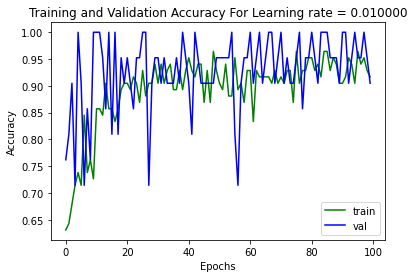

In [16]:
Acc_train = H.history['accuracy']
Accu_val = H.history['val_accuracy']
plt.plot(Acc_train, 'g', label='Training accuracy')
plt.plot(Accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy For Learning rate = %f' % learning_rate)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='lower right')
plt.show()